## Adjusting class_weights to make data balanced, indirectly(I mean by calculating class weights).

In [22]:
from sklearn.utils.class_weight import compute_class_weight

In [24]:
compute_class_weight(class_weight='balanced',classes=[1,0], y=[1,1,1,1,1,0,1,0])
# this y is y_true, not y_pred

array([0.66666667, 2.        ])

In [ ]:
# The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class 
# frequencies in the input data: n_samples / (n_classes * np.bincount(y))

# So with the balanced option, it tries to give weights to the points of each classes in such a way that the sum of
# weights for each of the classes is same.

In [ ]:
# we could also compute these based on the percentage ratio of each class, by inverting the percentage ratio. i.e
# 1:2:3 would be taken as 3:2:1

In [45]:
from sklearn.utils.class_weight import compute_sample_weight

In [27]:
compute_sample_weight(class_weight='balanced', y=[1,1,1,1,1,0,1,0], indices=None)
# here, in order to provide sample_weights, we give y=y_true, not y_pred

array([0.66666667, 0.66666667, 0.66666667, 0.66666667, 0.66666667,
       2.        , 0.66666667, 2.        ])

In [ ]:
# instead of computing class weights by your own, we can make use of these methods 

In [ ]:
# END

## Confusion matrix

In [29]:
from sklearn.metrics import confusion_matrix
y_true = [0, 0, 2, 2, 0, 2]
y_pred = [2, 0, 2, 2, 0, 1]
confusion_matrix(y_true, y_pred)

array([[2, 0, 1],
       [0, 0, 0],
       [0, 1, 2]])

In [41]:
from sklearn.metrics import confusion_matrix
y_true = [0, 0, 2, 2, 0, 2]
y_pred = [2, 0, 2, 2, 0, 1]
confusion_matrix(y_true, y_pred,labels=[0,1,2,3,4])
# this labels is going to give us confusion matrix of dimention len(labels)*len(labels)

array([[2, 0, 1, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 1, 2, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

In [48]:
y_true = [0, 1, 0, 1]
y_pred = [1, 1, 1, 0]
confusion_matrix(y_true, y_pred)

array([[0, 2],
       [1, 1]])

In [ ]:
'''

Remeber that the convension of confusion matrix in case of sklearn is slightly different than what sir told.
Both are correct, it is just reverting the actual and prection axis.

The convention which we should follow in theory is: take actual values in horizontal direction and predicted values
in vertical direction.

'''

In [46]:
y_true = [0, 1, 0, 1]
y_pred = [1, 1, 1, 0]
tn,fp,fn,tp = confusion_matrix(y_true, y_pred).ravel()

In [47]:
(tn, fp, fn, tp)

(0, 2, 1, 1)

In [ ]:
'''
Using confusion matrix with class weights
'''

In [54]:
y_true = [0, 1, 0, 1,1,1,1,1]
y_pred = [1, 1, 1, 0,0,1,1,1]

print(compute_class_weight(class_weight='balanced',classes=[0,1], y=y_true))
# so one correct classification for 1 in y_true, is considered to be 0.66666667, not 1.
# also one correct classification for 0 in y_true, is counted as 2, not 1.
# so that's the difference which we get, after applying class weights to the y_true.

print(confusion_matrix(y_true, y_pred,sample_weight=compute_sample_weight(class_weight='balanced' \
                                                                          ,y=y_true, indices=None)))

[2.         0.66666667]
[[0.         4.        ]
 [1.33333333 2.66666667]]


* In order to plot the confusion matrix in graph form we can make use of this link:
http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

## Plotting confusion matrix

In [96]:
cm = confusion_matrix(y_true, y_pred)

In [97]:
cm.astype('float')

array([[0., 2.],
       [2., 4.]])

In [98]:
cm.sum(axis=1)

array([2, 6])

In [99]:
cm.sum(axis=1)[:,np.newaxis]

array([[2],
       [6]])

In [100]:
cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
# this is called as normalization

array([[0.        , 1.        ],
       [0.33333333, 0.66666667]])

In [63]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [64]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    # cm.sum(axis=1)[:, np.newaxis] is equivalent to cm.sum(axis=1).reshape(len(cm.sum(axis=1)),1)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[0 2]
 [2 4]]
Normalized confusion matrix
[[0.         1.        ]
 [0.33333333 0.66666667]]


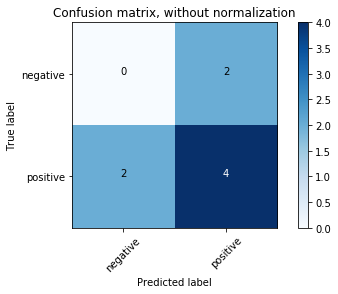

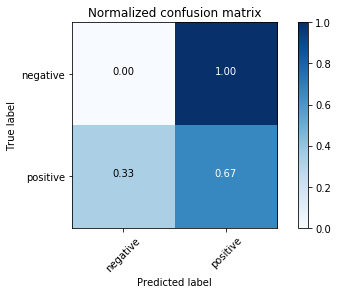

In [66]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(confusion_matrix(y_true, y_pred), classes=['negative','positive'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(confusion_matrix(y_true, y_pred), classes=['negative','positive'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

## Different-2 ways of using scoring metric while cross validating

In [205]:
X = np.array([[0,1,0,1,0,1],
     [1,1,1,1,0,1],
     [0,1,1,0,0,0],
     [1,0,0,1,1,1],
     [0,0,0,0,0,1],
     [1,1,1,1,1,1],
     [0,0,0,1,1,1],
     [0,0,0,0,0,0],
     [1,1,1,1,0,1],
     [0,1,1,0,0,0],
     [1,0,0,1,1,1],
     [0,0,0,0,0,1],
     [1,1,1,1,1,1],
     [0,0,0,1,1,1],
     [0,0,0,0,0,0],
     [0,0,1,0,1,1]])
# 8-datapoints i.e design matrix

y = np.array([1,1,1,0,1,0,1,1,1,1,1,0,1,0,1,1])
# lables

In [206]:
print(X.shape,y.shape)

(16, 6) (16,)


In [207]:
from sklearn.model_selection import train_test_split

In [208]:
X_1,X_test,y_1,y_test = train_test_split(X,y,test_size=0.3,shuffle=True,random_state=0)

In [209]:
X_1,y_1

(array([[0, 0, 0, 0, 0, 1],
        [0, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 1, 1, 1],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 1, 1],
        [0, 0, 0, 0, 0, 1],
        [1, 0, 0, 1, 1, 1],
        [0, 1, 0, 1, 0, 1],
        [1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1]]), array([1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1]))

In [210]:
X_test,y_test

(array([[1, 1, 1, 1, 0, 1],
        [0, 0, 0, 1, 1, 1],
        [1, 1, 1, 1, 0, 1],
        [0, 1, 1, 0, 0, 0],
        [0, 0, 0, 1, 1, 1]]), array([1, 1, 1, 1, 0]))

In [211]:
print(X_1.shape,y_1.shape)
print(X_test.shape,y_test.shape)

(11, 6) (11,)
(5, 6) (5,)


* ## Using cross_validate (not cross_val_score because cross_val_score is a special case of cross_validate)

In [212]:
from sklearn.model_selection import cross_validate

In [ ]:
'''

See the documentation of cross_val_score and cross_validate. Observe the difference in scoring and return parameters.

cross_val_score makes use of cross_validate internally to return the any type of performace metric score 
(but it has to be a single score number).

So cross_validate is more general method than cross_val_score. I mean cross_validate can also take dict in scoring
parameter i.e we can pass multiple scoring metric in a dictionary.

'''

See the documentation of cross_val_score and cross_validate.
http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html
http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

Read this documentation very carefully : http://scikit-learn.org/stable/modules/model_evaluation.html#defining-your-scoring-strategy-from-metric-functions

### a) Way_1 (in_general_method)

In [214]:
from sklearn.naive_bayes import BernoulliNB
import pandas as pd

In [215]:
for alpha_i in [2.2]: # you_can_give_lot_of_values_of_alpha
    
    naive_clf = BernoulliNB(alpha=1, binarize=None, class_prior=None, fit_prior=True)
    
    weight_vector_y_1 = compute_sample_weight(class_weight='balanced', y=y_1, indices=None)
    
    dict_of_scores = cross_validate(naive_clf,X_1,y_1,scoring='accuracy',cv=3,fit_params= \
                                                {'sample_weight': weight_vector_y_1},return_train_score=True)
    # here in cross_validate, we have multiple options in case of scoring and cv
    
    print(dict_of_scores)

{'fit_time': array([0.00100899, 0.00096297, 0.00054002]), 'score_time': array([0.00038409, 0.00023794, 0.00024915]), 'test_score': array([0.75      , 0.5       , 0.33333333]), 'train_score': array([0.71428571, 0.71428571, 0.75      ])}


In [216]:
# I will get this type of dictionary for each fold.
pd.DataFrame(dict_of_scores)
# So for every value of hyperparameter, I will get k(equal to folds) values of each of the scores' mentioned as a
# parameter of scoring in the form of dictionary.

,fit_time,score_time,test_score,train_score
0,0.001009,0.000384,0.750000,0.714286
1,0.000963,0.000238,0.500000,0.714286
2,0.000540,0.000249,0.333333,0.750000


### b) Way_2 (Using multiple string scoring parameters in a dictionary)

we can see all the strings, which you can pass in scoring parameter, here:
<b>sklearn.metrics.SCORER</b>

In [220]:
from sklearn.metrics import SCORERS

In [221]:
SCORERS

{'accuracy': make_scorer(accuracy_score),
 'adjusted_mutual_info_score': make_scorer(adjusted_mutual_info_score),
 'adjusted_rand_score': make_scorer(adjusted_rand_score),
 'average_precision': make_scorer(average_precision_score, needs_threshold=True),
 'completeness_score': make_scorer(completeness_score),
 'explained_variance': make_scorer(explained_variance_score),
 'f1': make_scorer(f1_score),
 'f1_macro': make_scorer(f1_score, pos_label=None, average=macro),
 'f1_micro': make_scorer(f1_score, pos_label=None, average=micro),
 'f1_samples': make_scorer(f1_score, pos_label=None, average=samples),
 'f1_weighted': make_scorer(f1_score, pos_label=None, average=weighted),
 'fowlkes_mallows_score': make_scorer(fowlkes_mallows_score),
 'homogeneity_score': make_scorer(homogeneity_score),
 'log_loss': make_scorer(log_loss, greater_is_better=False, needs_proba=True),
 'mean_absolute_error': make_scorer(mean_absolute_error, greater_is_better=False),
 'mean_squared_error': make_scorer(mean_sq

In [223]:
for alpha_i in [2.2]: # you_can_give_lot_of_values_of_alpha
    
    naive_clf = BernoulliNB(alpha=1, binarize=None, class_prior=None, fit_prior=True)
    
    weight_vector_y_1 = compute_sample_weight(class_weight='balanced', y=y_1, indices=None)
    
    dict_of_scores = cross_validate(naive_clf,X_1,y_1,scoring={'accuracy','precision','recall','f1'}
                        ,cv=3,fit_params= {'sample_weight': weight_vector_y_1},return_train_score=True)
    # here in cross_validate, we have multiple options in case of scoring and cv
    
    print(dict_of_scores)

{'fit_time': array([0.00100803, 0.00041699, 0.00044227]), 'score_time': array([0.00247383, 0.00126195, 0.0027709 ]), 'test_precision': array([0.75, 1.  , 0.  ]), 'train_precision': array([1.        , 0.8       , 0.83333333]), 'test_f1': array([0.85714286, 0.5       , 0.        ]), 'train_f1': array([0.75      , 0.8       , 0.83333333]), 'test_recall': array([1.        , 0.33333333, 0.        ]), 'train_recall': array([0.6       , 0.8       , 0.83333333]), 'test_accuracy': array([0.75      , 0.5       , 0.33333333]), 'train_accuracy': array([0.71428571, 0.71428571, 0.75      ])}


/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [224]:
# I will get this type of dictionary for each fold
pd.DataFrame(dict_of_scores)
# So for every value of hyperparameter, I will get k(equal to folds) values of each of the scores' string mentioned 
# as a parameter of scoring in the form of dictionary.

,fit_time,score_time,test_accuracy,test_f1,test_precision,test_recall,train_accuracy,train_f1,train_precision,train_recall
0,0.001008,0.002474,0.750000,0.857143,0.75,1.000000,0.714286,0.750000,1.000000,0.600000
1,0.000417,0.001262,0.500000,0.500000,1.00,0.333333,0.714286,0.800000,0.800000,0.800000
2,0.000442,0.002771,0.333333,0.000000,0.00,0.000000,0.750000,0.833333,0.833333,0.833333


### c) Way_3 (Using multiple scorers in a dictionary & Using cross validator generator)

Read about the make_scorer() and get_scorer() methods from this link:
http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html
http://scikit-learn.org/stable/modules/generated/sklearn.metrics.get_scorer.html

In [231]:
from sklearn.metrics import make_scorer,get_scorer
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import TimeSeriesSplit

In [234]:
import warnings
warnings.filterwarnings('ignore')

In [232]:
print(get_scorer('accuracy'),get_scorer('precision'),get_scorer('recall'),get_scorer('f1'))

make_scorer(accuracy_score) make_scorer(precision_score) make_scorer(recall_score) make_scorer(f1_score)


In [244]:
for alpha_i in [2.2]: # you_can_give_lot_of_values_of_alpha
    
    naive_clf = BernoulliNB(alpha=1, binarize=None, class_prior=None, fit_prior=True)
    
    weight_vector_y_1 = compute_sample_weight(class_weight='balanced', y=y_1, indices=None)
    
    dict_of_scores = cross_validate(naive_clf,X_1,y_1,scoring={'accuracy':make_scorer(accuracy_score, \
                        greater_is_better=True),'precision':make_scorer(precision_score,greater_is_better=True), \
                        'recall': make_scorer(recall_score,greater_is_better=True), \
                        'f1': make_scorer(f1_score,greater_is_better=True)}
                        ,cv=TimeSeriesSplit(n_splits=3).split(X_1), \
                         fit_params= {'sample_weight': weight_vector_y_1},return_train_score=True)
    # here in cross_validate, we have multiple options in case of scoring and cv
    # If you want loss then make greater_is_better = False, so it would just invert the sign of score(profit) to 
    # make it a loss
    
    print(dict_of_scores)

{'fit_time': array([0.00146794, 0.00046015, 0.00043082]), 'score_time': array([0.00238204, 0.00132704, 0.00242925]), 'test_accuracy': array([0.5, 0.5, 0.5]), 'train_accuracy': array([1.        , 0.85714286, 0.77777778]), 'test_precision': array([0.5, 0.5, 0. ]), 'train_precision': array([1.        , 1.        , 0.85714286]), 'test_recall': array([1., 1., 0.]), 'train_recall': array([1.        , 0.83333333, 0.85714286]), 'test_f1': array([0.66666667, 0.66666667, 0.        ]), 'train_f1': array([1.        , 0.90909091, 0.85714286])}


In [245]:
# I will get this type of dictionary for each fold
pd.DataFrame(dict_of_scores)
# So for every value of hyperparameter, I will get k(equal to folds) values of each of the scores' string mentioned 
# as a parameter of scoring in the form of dictionary.

,fit_time,score_time,test_accuracy,test_f1,test_precision,test_recall,train_accuracy,train_f1,train_precision,train_recall
0,0.001468,0.002382,0.5,0.666667,0.5,1.0,1.000000,1.000000,1.000000,1.000000
1,0.000460,0.001327,0.5,0.666667,0.5,1.0,0.857143,0.909091,1.000000,0.833333
2,0.000431,0.002429,0.5,0.000000,0.0,0.0,0.777778,0.857143,0.857143,0.857143


### d)  Way_4(Using our own custom loss function using make_scorer factory)

Complete in-depth discussion of all kind of scoring, scorers and custom score & loss function can be seen here :
http://scikit-learn.org/stable/modules/model_evaluation.html

In [248]:
def my_custom_func(ground_truth, predictions):
    # here you can write any kind of score function, not only those who have been implemented.
    return accuracy_score(ground_truth,predictions,sample_weight= \
                          compute_sample_weight(class_weight='balanced', y=ground_truth, indices=None))
    # since this custom function would be called by make_scorer and we already gave sample_weights in fit_param of
    # 

# func will negate the return value of my_custom_func, if greater_is_better = False
loss = make_scorer(my_custom_func, greater_is_better=False,needs_proba=False,needs_threshold=False)
score = make_scorer(my_custom_func, greater_is_better=True,needs_proba=False,needs_threshold=False)